In [23]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 10)
import numpy as np
import seaborn as sns

## EDA

In [25]:
Badges = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Badges.csv')
Comments = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Comments.csv')
PostHistory = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/PostHistory.csv')
Postlinks = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Postlinks.csv')
Posts = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Posts.csv')
Users = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Users.csv')
Votes = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Votes.csv')

Text(0.5,1,'Posts NA')

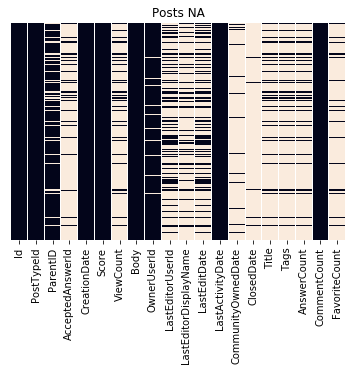

In [26]:
sns.heatmap(Posts.isnull(), yticklabels=False, cbar=False)
plt.title('Posts NA')

In [308]:
Posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
Id                       100000 non-null int64
PostTypeId               100000 non-null int64
ParentID                 81053 non-null float64
AcceptedAnswerId         15069 non-null float64
CreationDate             100000 non-null object
Score                    100000 non-null int64
ViewCount                18947 non-null float64
Body                     100000 non-null object
OwnerUserId              96210 non-null float64
LastEditorUserId         35095 non-null float64
LastEditorDisplayName    21143 non-null object
LastEditDate             35478 non-null object
LastActivityDate         100000 non-null object
CommunityOwnedDate       5502 non-null object
ClosedDate               2047 non-null object
Title                    18947 non-null object
Tags                     18947 non-null object
AnswerCount              18947 non-null float64
CommentCount             100000 non-n

### Answers Posts

In [213]:
import datetime
import calendar

#date to timestamp
def date_ts(s):
    """ 
    param s: str - date
    returns: int - timestamp
    """
    date = datetime.datetime.strptime(s, "%Y-%m-%dT%H:%M:%S")
    st = calendar.timegm(date.utctimetuple())
    return(st)

In [218]:
df_answers = Posts[Posts.PostTypeId == 2]

In [219]:
df_answers = df_answers.reset_index(drop=True)

In [220]:
df_answers.CreationDate = df_answers.CreationDate.str[:-4]

In [222]:
timestamp = [date_ts(i) for i in df_answers.CreationDate]

In [224]:
df_answers_time = pd.DataFrame({'ParentID':df_answers.ParentID, 'Cr_time':timestamp})

In [226]:
df_list = df_answers_time.groupby(df_answers_time.ParentID)

In [228]:
uni_par_id = list(df_answers_time.ParentID.unique())

In [290]:
ans_date = [list(df_list.get_group(i).Cr_time) for i in uni_par_id]

In [291]:
yes = 0
no = 0
for i in ans_date:
    if len(i) == 1:
        yes += 1
    else:
        no += 1
print(yes, no)

#there are 2917 posts with only 1 answer, 15773 posts with more than 1 answers.

2917 15773


In [293]:
#set 1-answer post sd to 0
for i in ans_date:
    if len(i) == 1:
        i.append(i[0])
    else:
        i == i

In [295]:
import statistics
ans_time_sd = [statistics.stdev(i) for i in ans_date]

In [304]:
post_Id = sorted(list(df_answers.ParentID.unique()))

In [305]:
post_ans_sd = pd.DataFrame({'post_Id':post_Id, 'time_sd':ans_time_sd})

In [320]:
post_ans_sd.head()

,post_Id,time_sd
0,4.0,1.724331e+06
1,6.0,1.628865e+06
2,9.0,2.005625e+06
3,11.0,1.567259e+06
4,13.0,9.701637e+05


### Parents Posts

In [309]:
Parents_post = Posts[Posts.PostTypeId == 1]

In [316]:
Parents_post = Parents_post.reset_index(drop=True)

In [317]:
Parents_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18947 entries, 0 to 18946
Data columns (total 20 columns):
Id                       18947 non-null int64
PostTypeId               18947 non-null int64
ParentID                 0 non-null float64
AcceptedAnswerId         15069 non-null float64
CreationDate             18947 non-null object
Score                    18947 non-null int64
ViewCount                18947 non-null float64
Body                     18947 non-null object
OwnerUserId              17701 non-null float64
LastEditorUserId         14223 non-null float64
LastEditorDisplayName    9820 non-null object
LastEditDate             14381 non-null object
LastActivityDate         18947 non-null object
CommunityOwnedDate       715 non-null object
ClosedDate               2047 non-null object
Title                    18947 non-null object
Tags                     18947 non-null object
AnswerCount              18947 non-null float64
CommentCount             18947 non-null int64
Favo

In [318]:
df_parents = pd.DataFrame({'post_Id':Parents_post.Id, 'Views_count':Parents_post.ViewCount,\
                           'Score':Parents_post.Score, 'Comment_count':Parents_post.CommentCount})

In [323]:
df_comb = df_parents.join(post_ans_sd.set_index('post_Id'), on='post_Id')

In [325]:
df_comb.head()

,Comment_count,Score,Views_count,post_Id,time_sd
0,1,543,34799.0,4,1.724331e+06
1,0,241,15696.0,6,1.628865e+06
2,16,1716,439828.0,9,2.005625e+06
3,3,1286,130055.0,11,1.567259e+06
4,6,519,149911.0,13,9.701637e+05


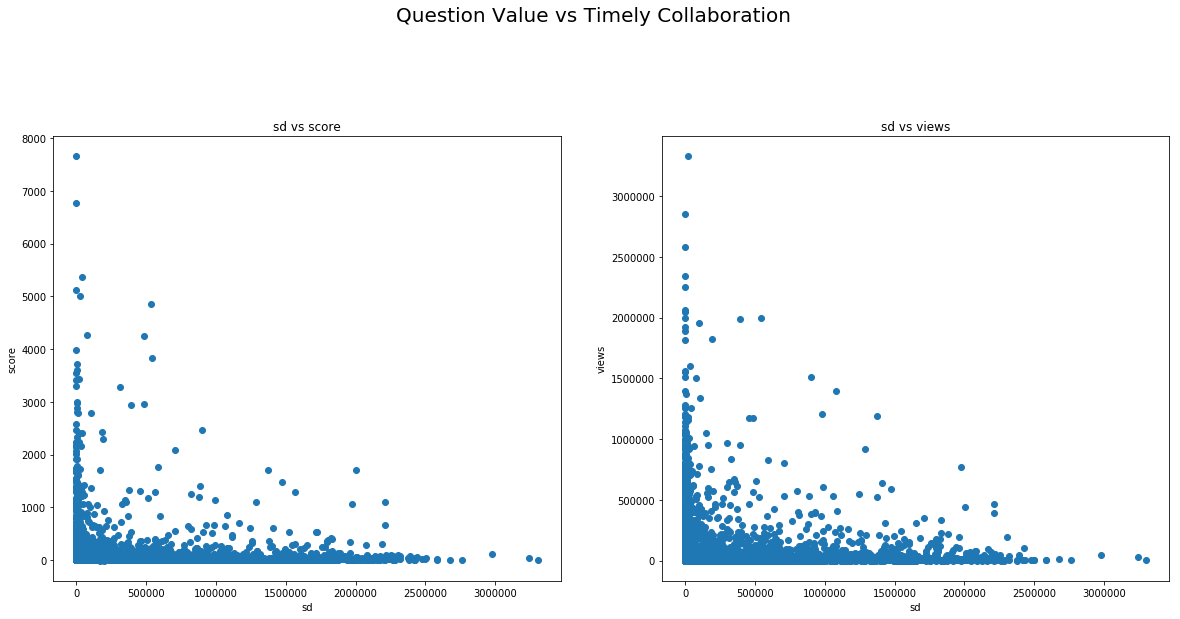

In [338]:
fig=plt.figure(figsize=(20,18))
plt.suptitle("Question Value vs Timely Collaboration", size=20)
plt.subplot(221)
plt.scatter(df_comb.time_sd, df_comb.Score)
plt.title('sd vs score')
plt.xlabel('sd')
plt.ylabel('score')
plt.subplot(222)
plt.title('sd vs views')
plt.xlabel('sd')
plt.ylabel('views')
plt.scatter(df_comb.time_sd, df_comb.Views_count)